In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = data.iloc[:,[3,4]].values

We need to make the clusters based on Annual income and their Spending score, so that it will be helpfull for Market Segmentation. So whenever the Mall builds any new Product then it will try to focus on those customers based on their cluster, whether they are going to buy our new product or not.

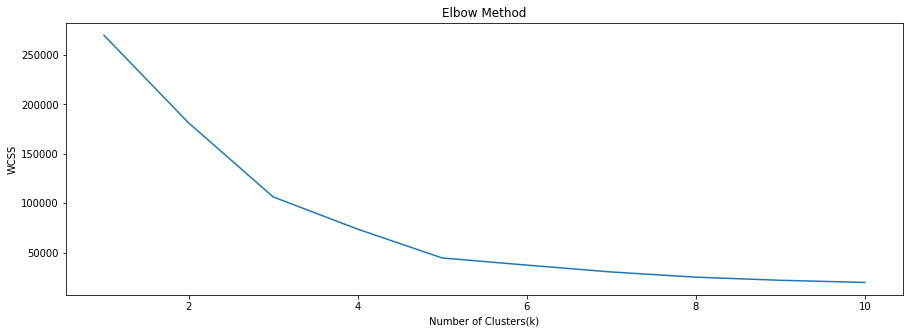

In [26]:
#K-Means clustering bigins with the Value of K.
#We will find the value of K with the help of ELBOW Method.
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5), facecolor='white')
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('WCSS')
plt.show()

From the above figure we can find that value for K is 5 because after that value there is no steep change in WCSS value or after K=5 curve become little smoother. Now we will use this value of K in our clustering algorithm.

In [29]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Now each sample of X is mapped into a perticular cluster, Lets visualise how the data is mapped inside all 5 clusters

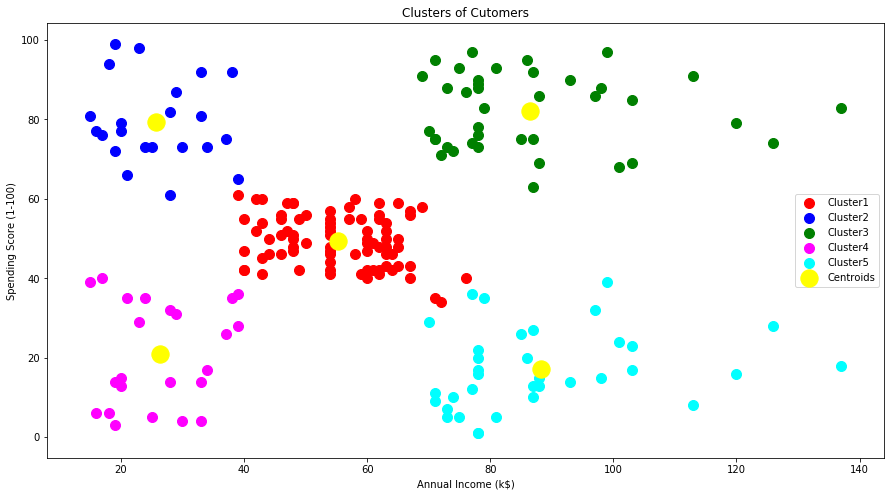

In [33]:
plt.figure(figsize=(15,8), facecolor='white')
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s = 100,c = 'red',label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s = 100,c = 'blue',label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s = 100,c = 'green',label = 'Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s = 100,c = 'magenta',label = 'Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s = 100,c = 'cyan',label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label = 'Centroids')
plt.title("Clusters of Cutomers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()